Adınız: Zeynep

Soyadınız: Söylemez

Okul Numarası: 2212721031

GitHub Repo Bağlantısı: https://github.com/zeynep-35/CNN_siniflandirma

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_DIR = '/content/drive/MyDrive/makine_ogrenmesi_odev_1'

# Adım 2.2: Online Veri Artırımı
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Adım 2.1: Batch size 16 veya 8 küçük veri setlerinde daha iyi sonuç verir
BATCH_SIZE = 8

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 128 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [ ]:
# Adım 2.1: Parametre Değişiklikleri (Filtre sayısı ve katman artışı)
model3 = Sequential([
    # 1. Blok
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # 2. Blok
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # 3. Blok (Yeni katman)
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # 4. Blok (Yeni katman - Filtre sayısı artırıldı)
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'), # Kapasite artırıldı
    BatchNormalization(),
    Dropout(0.5), # Adım 2.1: Dropout oranı 0.5 yapıldı
    Dense(train_generator.num_classes, activation='softmax')
])

# Adım 2.1: Öğrenme oranı 0.0001 (Daha yavaş ve kaliteli öğrenme)
model3.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Epoch sayısını 40 yapalım ki modelin öğrenmek için vakti olsun
history3 = model3.fit(train_generator, epochs=40, validation_data=test_generator)

# Final Test Sonucu
test_loss, test_acc = model3.evaluate(test_generator)
print(f"\n--- Model 3 Sonuç ---")
print(f"Test Seti Doğruluğu: %{test_acc*100:.2f}")

Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.6677 - loss: 1.0717 - val_accuracy: 0.5000 - val_loss: 0.7325
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7160 - loss: 1.0749 - val_accuracy: 0.5000 - val_loss: 1.0308
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7613 - loss: 0.7053 - val_accuracy: 0.5000 - val_loss: 1.3977
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8106 - loss: 0.4936 - val_accuracy: 0.5000 - val_loss: 1.7268
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7740 - loss: 0.6613 - val_accuracy: 0.5000 - val_loss: 2.6347
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8508 - loss: 0.5380 - val_accuracy: 0.5000 - val_loss: 3.0926
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8114 - loss: 0.6379 - val_accuracy: 0.5000 - val_loss: 2.6059
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7799 - loss: 0.5253 - val_accuracy: 0.5000 - val_loss:

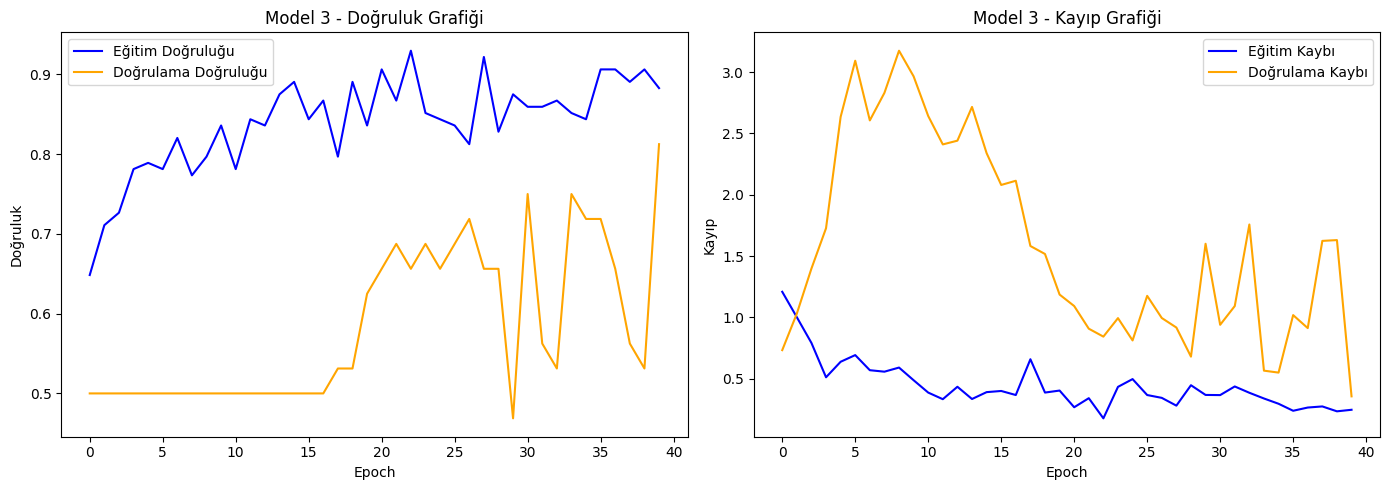

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 987ms/step - accuracy: 0.8000 - loss: 0.4482

Model 3 Test Seti Doğruluğu: %81.25


In [ ]:
import matplotlib.pyplot as plt

# 1. Doğruluk (Accuracy) ve Kayıp (Loss) Grafiklerini Çizdirme
plt.figure(figsize=(14, 5))

# Doğruluk Grafiği
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Eğitim Doğruluğu', color='blue')
plt.plot(history3.history['val_accuracy'], label='Doğrulama Doğruluğu', color='orange')
plt.title('Model 3 - Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp Grafiği
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Eğitim Kaybı', color='blue')
plt.plot(history3.history['val_loss'], label='Doğrulama Kaybı', color='orange')
plt.title('Model 3 - Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Test Seti Doğruluğunu Raporlama (Adım 2.3)
test_loss, test_acc = model3.evaluate(test_generator)
print(f"\nModel 3 Test Seti Doğruluğu: %{test_acc*100:.2f}")